# Email Open Rate Analysis

This project provides tools to statistically analyze and visualize the effectiveness of different email versions based on their open rates.

## Overview
With the proliferation of email marketing, understanding which version of an email performs best is essential for businesses. This project aims to provide both statistical testing and visualization tools to aid in this decision-making process.

### Features

1. **Statistical Testing**: Implements a Chi-squared test to determine if the differences in open rates among various email versions are statistically significant.

2. **Visualization**: Plots the posterior distributions of open rates using Bayesian methods. This helps in visualizing the uncertainty around the estimated open rates for each email version.

## Usage
The primary functions provided are:
- `test_open_rates(open_rates, n_messages)`: Performs a Chi-squared test on the observed open rates.
- `plot_open_rate_distributions(open_rates, n_messages, labels=None, n_samples=100000)`: Plots the posterior distributions of open rates for each email version.

## Example
Given a list of open rates and a corresponding list of total messages sent for each version, the functions can be invoked as demonstrated in the main script.

## Dependencies
- numpy
- matplotlib
- scipy

In [61]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [62]:
from scipy.stats import chi2_contingency

def test_open_rates(open_rates, n_messages):
    if len(open_rates) != len(n_messages):
        raise ValueError("Both lists must have the same length.")

    # Calculate observed counts based on open rates
    opened = [int(open_rate * n) for open_rate, n in zip(open_rates, n_messages)]
    not_opened = [n - opens for opens, n in zip(opened, n_messages)]

    # Observed data
    observed = [opened, not_opened]

    chi2, p, _, _ = chi2_contingency(observed)

    print("Chi2 value:", chi2)
    print("P value:", p)

    if p < 0.05:
        return "The differences in open rates among the versions are statistically significant."
    else:
        return "The differences in open rates among the versions are not statistically significant."

In [64]:
def plot_open_rate_distributions(open_rates, n_messages, labels=None, n_samples=100000):
    if len(open_rates) != len(n_messages):
        raise ValueError("Both lists must have the same length.")
        
    if not labels:
        labels = [f"Version {chr(65+i)}" for i in range(len(open_rates))]
    
    # Calculate successes from open rates
    successes = [int(open_rate * n) for open_rate, n in zip(open_rates, n_messages)]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # For each version, sample from the posterior distribution
    for success, n, label in zip(successes, n_messages, labels):
        samples = np.random.beta(success + 1, n - success + 1, n_samples)
        plt.hist(samples, bins=50, alpha=0.4, label=label)

    # Set the background color to a very light grey
    ax.set_facecolor('#F8F8FF')
        # Change the spine color
    line_colour='#a2becd'
    
    for spine in ax.spines.values():
        spine.set_edgecolor(line_colour)
    # Remove ticklines 
    ax.tick_params(left=False, bottom=False)     
    
    plt.legend()
    plt.xlabel('Open Rate')
    plt.ylabel('Frequency')
    plt.title('Posterior Distributions of Open Rates for Each Version')
    plt.grid(True, which='both', color='#b3cee5', linestyle='-', linewidth=0.5)
    plt.show()

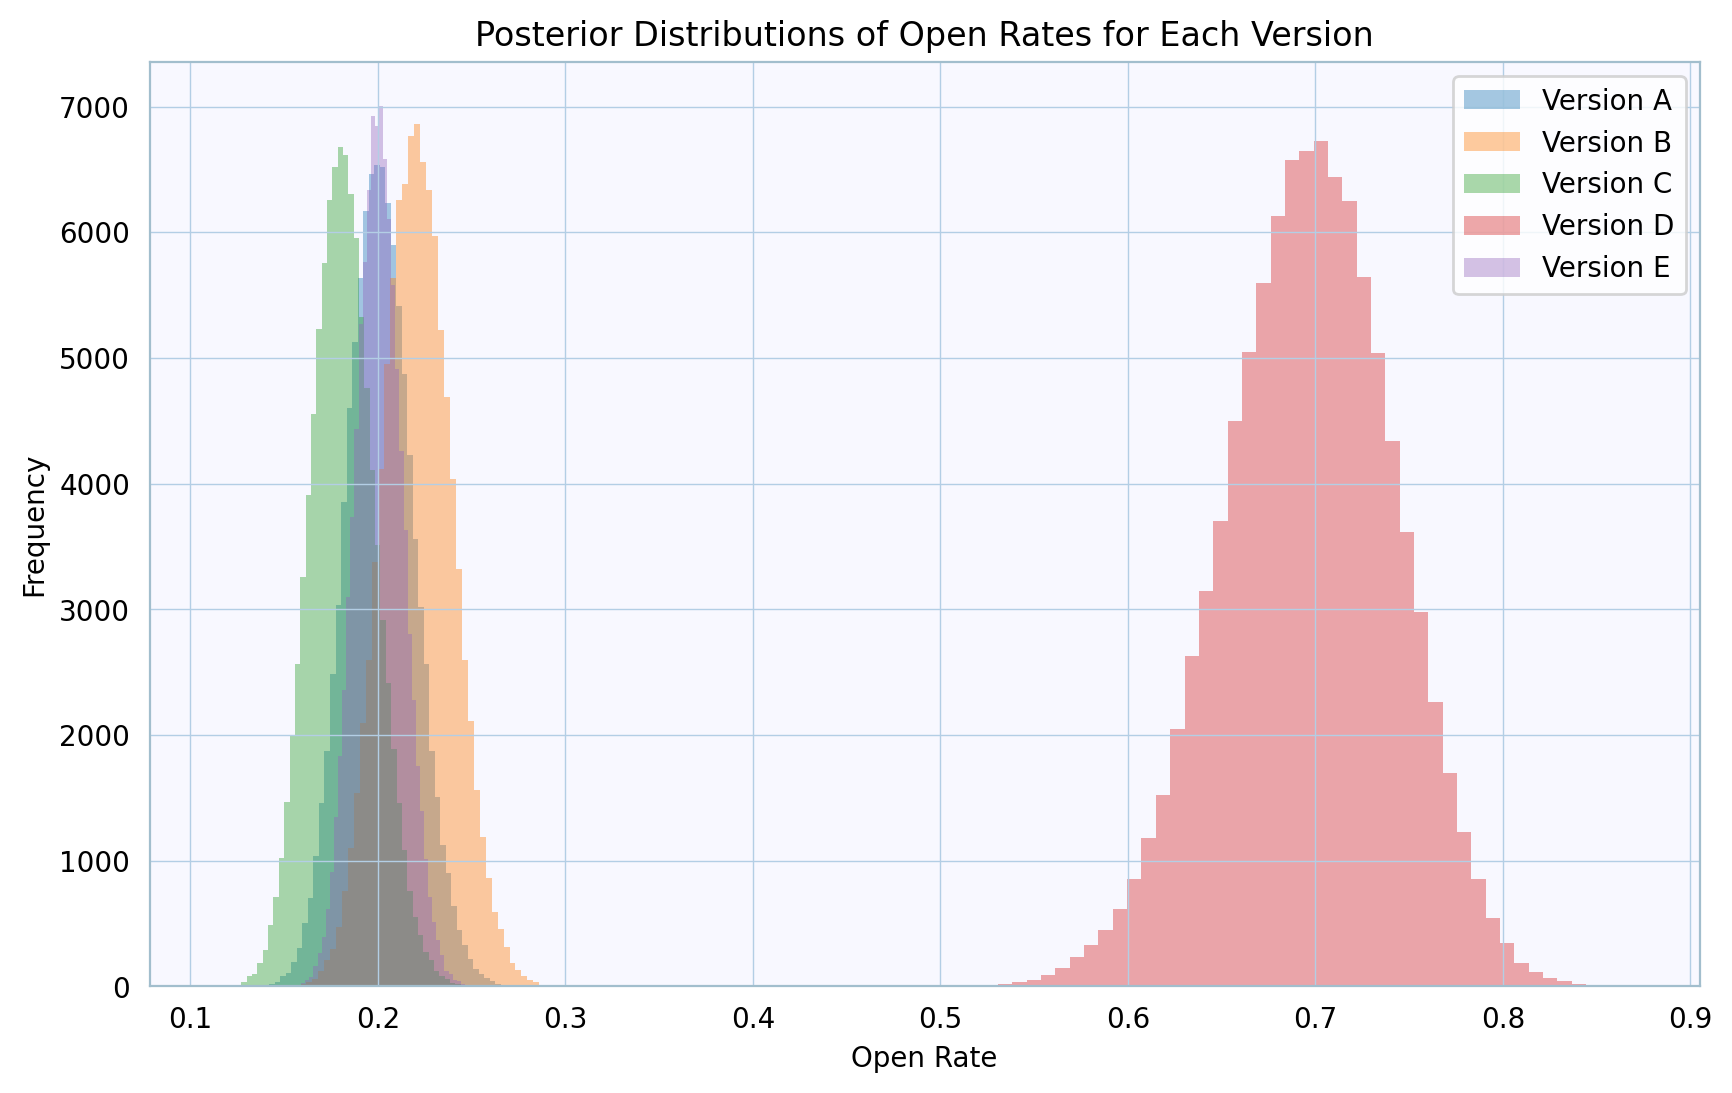

Chi2 value: 142.77417682136377
P value: 7.188570439577469e-30
The differences in open rates among the versions are statistically significant.


In [69]:
# Example usage:
open_rates = [0.20, 0.22, 0.18, 0.7, 0.2]
n_messages = [500, 500, 500, 100, 1000]
plot_open_rate_distributions(open_rates, n_messages)
print(test_open_rates(open_rates, n_messages))